In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from stabnode.schedulers import ExpLossTimeDecayScheduler, OLDExpLossTimeDecayScheduler

In [2]:

def synthetic_metrics_full_plateaus(
    num_steps=200,
    decay_rate=0.98,
    spike_interval=50,
    spike_increase=0.2,
    plateau_length_before=10,
    plateau_length_after=10,
    noise=0.01
):
    """
    Generate synthetic training loss:
    - Exponential decay overall.
    - Plateau of `plateau_length_before` epochs before alpha change.
    - Spike at alpha change (+ spike_increase).
    - Plateau of `plateau_length_after` epochs after spike.
    """
    losses = []
    current = 1.0
    plateau_counter = 0
    plateau_phase = None  # None, "before", "after"

    for i in range(num_steps):
        # Trigger pre-spike plateau
        if i % spike_interval == spike_interval - plateau_length_before and i > 0:
            plateau_counter = plateau_length_before
            plateau_phase = "before"

        if plateau_counter > 0:
            plateau_counter -= 1
            loss = current + 0*np.random.normal(0, noise)
            losses.append(loss)
            # After finishing pre-spike plateau, trigger spike
            if plateau_counter == 0 and plateau_phase == "before":
                current += spike_increase
                plateau_counter = plateau_length_after
                plateau_phase = "after"
            continue

        # Normal exponential decay
        current *= decay_rate
        loss = current + 0*np.random.normal(0, noise)
        losses.append(loss)

    return np.array(losses)


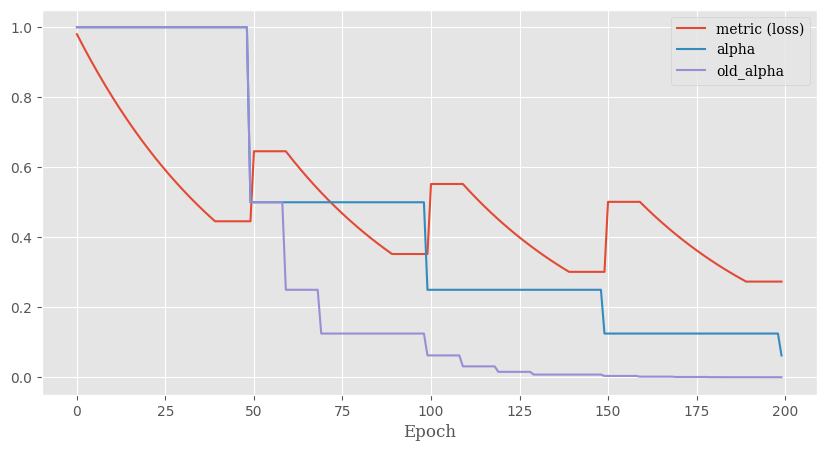

In [3]:

# Instantiate scheduler
sched = ExpLossTimeDecayScheduler(init_alpha=1.0, gamma=0.5, patience=10, cooldown=2,rtol=0)
old_sched = OLDExpLossTimeDecayScheduler(init_alpha=1.,gamma=0.5,patience=10,cooldown=2,rtol=0)

# Run simulation
metrics = synthetic_metrics_full_plateaus()
alphas = []
old_alphas = []
for m in metrics:
    sched.step(m)
    old_sched.step(m)
    alphas.append(sched.get_alpha())
    old_alphas.append(old_sched.get_alpha())

# Plot results
plt.figure(figsize=(10,5))
plt.plot(metrics, label="metric (loss)")
plt.plot(alphas, label="alpha")
plt.plot(old_alphas,label="old_alpha")
plt.legend(prop={'family':'serif'})
plt.xlabel("Epoch",family='serif')
plt.show()


In [30]:
alphas[:10]

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5]

In [9]:
sched = ExpLossTimeDecayScheduler(init_alpha=1.0, gamma=0.5, patience=10, cooldown=2,rtol=0)

In [10]:
for i in range(50):
    sched.step(metrics[i])

In [ ]:
sched.step(metrics[53])

In [23]:
metrics[53]

0.6457004039509507

In [21]:
sched.best_metric, sched.patience_count

(0.44570040395095073, 0)